# Run py12box model
Run the AGAGE 12-box model

In [ ]:
import os
import matplotlib.pyplot as plt
import setup
import core

In [23]:
dir_path = os.path.realpath(".")
input_dir = os.path.join(dir_path, "inputs")
case_dir = os.path.join(dir_path, "example")

In [24]:
species = "CFC-11"
mol_mass = 137.3688
time, emissions, ic, lifetime = setup.get_species_parameters(case_dir, species)

In [25]:
i_t, i_v1, t, v1, OH, Cl, temperature = setup.get_model_parameters(input_dir,
                                                                   int(len(time) / 12))
F = setup.transport_matrix(i_t, i_v1, t, v1)
c_month, burden, emissions_out, losses, lifetimes = \
    core.model(ic=ic, q=emissions,
               mol_mass=mol_mass,
               lifetime=lifetime,
               F=F,
               temp=temperature,
               Cl=Cl, OH=OH)

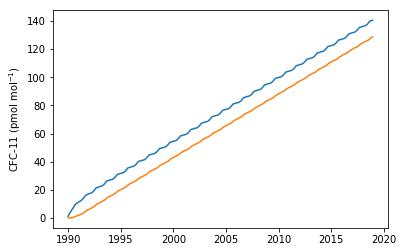

In [26]:
plt.plot(time, c_month[:, 0])
plt.plot(time, c_month[:, 3])
plt.ylabel("%s (pmol mol$^{-1}$)" % species)
plt.show()